In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#import the requests library
import requests
#Import the API key
from config import weather_api_key

In [2]:
#Createa set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.00, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
#Use the tuple()function to display the latitude and longitude combination
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

attawapiskat ca
busselton au
qena eg
kamina cd
strezhevoy ru
belushya guba ru
busselton au
guararema br
tasiilaq gl
saint george bm
puerto madryn ar
sembe cg
emba kz
pokhara np
acari pe
cidreira br
babai in
likasi cd
boysun uz
bilma ne
oistins bb
eydhafushi mv
illoqqortoormiut gl
seredeyskiy ru
shahreza ir
souillac mu
hithadhoo mv
tasiilaq gl
dzilam gonzalez mx
bambous virieux mu
kousseri cm
berlevag no
road town vg
arraial do cabo br
sao filipe cv
mpanda tz
husavik is
nalut ly
mahebourg mu
illoqqortoormiut gl
bredasdorp za
korla cn
galle lk
chuy uy
port elizabeth za
gwadar pk
taolanaro mg
namibe ao
wiwili ni
autazes br
iqaluit ca
jamestown sh
remedios pa
longyearbyen sj
barentsburg sj
kosa ru
kudahuvadhoo mv
barentsburg sj
taolanaro mg
east london za
belushya guba ru
ushuaia ar
ushuaia ar
sandy bay hn
ribeira grande pt
abnub eg
taolanaro mg
mahebourg mu
bazaliya ua
hermanus za
ushuaia ar
hualmay pe
dospat bg
east london za
pestovo ru
praia da vitoria pt
tasiilaq gl
cirpan bg
cape town

mahebourg mu
taolanaro mg
abeche td
sabzevar ir
pangody ru
atasu kz
rayadrug in
bambous virieux mu
ushuaia ar
synya ru
jamestown sh
dolny kubin sk
souillac mu
umtata za
qaanaaq gl
grand river south east mu
bredasdorp za
arraial do cabo br
eidsvoll no
ceska skalice cz
ostrovnoy ru
awbari ly
georgetown sh
georgetown sh
itarema br
ovalle cl
punta arenas cl
cape town za
arraial do cabo br
tsihombe mg
tiznit ma
mao td
alegrete br
upernavik gl
upernavik gl
sorvag fo
tasiilaq gl
penaflor cl
ushuaia ar
chiriqui pa
iqaluit ca
najran sa
busselton au
canoinhas br
suluq ly
georgetown sh
georgetown sh
east london za
port alfred za
barentsburg sj
caravelas br
jamestown sh
klaksvik fo
kuli ru
ushuaia ar
micheweni tz
upernavik gl
barra patuca hn
mastic beach us
punta arenas cl
grand gaube mu
olafsvik is
nouadhibou mr
bredasdorp za
kamariotissa gr
amderma ru
taolanaro mg
jetalsar in
port elizabeth za
punta arenas cl
jamestown sh
hatillo us
tasiilaq gl
thinadhoo mv
bathsheba bb
magole tz
mwense zm
taola

muros es
georgetown sh
coruripe br
lagoa pt
vredendal za
ijui br
paamiut gl
hithadhoo mv
marabba sd
bilma ne
havre-saint-pierre ca
longyearbyen sj
port alfred za
porto novo cv
margate za
chaman pk
port elizabeth za
attawapiskat ca
campos novos br
salalah om
maghama mr
itupiranga br
cabrobo br
baraboo us
oyem ga
port elizabeth za
hermanus za
illoqqortoormiut gl
busselton au
adrar dz
dikson ru
bachatskiy ru
torbay ca
villa oliva py
hermanus za
ciudad bolivar ve
nivala fi
busselton au
tasiilaq gl
ushuaia ar
cidreira br
klaksvik fo
stary plzenec cz
jamestown sh
grindavik is
alcaniz es
vestmannaeyjar is
ushuaia ar
ponta do sol cv
tsiroanomandidy mg
souillac mu
saint-philippe re


In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

643

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be247afa12502137d0408caf60056d6c


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be247afa12502137d0408caf60056d6c&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":74.26,"feels_like":68.52,"temp_min":72,"temp_max":75.99,"pressure":1022,"humidity":35},"visibility":10000,"wind":{"speed":8.05,"deg":220},"clouds":{"all":75},"dt":1604773031,"sys":{"type":1,"id":3486,"country":"US","sunrise":1604748340,"sunset":1604784617},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.26,
  'feels_like': 68.52,
  'temp_min': 72,
  'temp_max': 75.99,
  'pressure': 1022,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1604773031,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604748340,
  'sunset': 1604784617},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.26,
  'feels_like': 68.52,
  'temp_min': 72,
  'temp_max': 75.99,
  'pressure': 1022,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1604773031,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604748340,
  'sunset': 1604784617},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1604748340,
 'sunset': 1604784617}

In [18]:
boston_data['dt']

1604773031

In [19]:
boston_data['coord']['lat']

42.36

In [20]:
boston_data['main']['temp_max']

75.99

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75.99 35 75 8.05


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 11, 7, 18, 17, 11)

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 13 | busselton
Processing Record 3 of Set 13 | qena
Processing Record 4 of Set 13 | kamina
Processing Record 5 of Set 13 | strezhevoy
Processing Record 6 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 13 | guararema
Processing Record 8 of Set 13 | tasiilaq
Processing Record 9 of Set 13 | saint george
Processing Record 10 of Set 13 | puerto madryn
Processing Record 11 of Set 13 | sembe
Processing Record 12 of Set 13 | emba
Processing Record 13 of Set 13 | pokhara
Processing Record 14 of Set 13 | acari
Processing Record 15 of Set 13 | cidreira
Processing Record 16 of Set 13 | babai
Processing Record 17 of Set 13 | likasi
Processing Record 18 of Set 13 | boysun
Processing Record 19 of Set 13 | bilma
Processing Record 20 of Set 13 | oistins
Processing Record 21 of Set 13 | eydhafushi
Processing Record 22 of Set 13 | illoqqortoormiut
City not found. Skipping.

Processing Record 34 of Set 16 | toktogul
Processing Record 35 of Set 16 | nanortalik
Processing Record 36 of Set 16 | ambanja
Processing Record 37 of Set 16 | oranjemund
Processing Record 38 of Set 16 | soyo
Processing Record 39 of Set 16 | pangnirtung
Processing Record 40 of Set 16 | gat
Processing Record 41 of Set 16 | burica
City not found. Skipping...
Processing Record 42 of Set 16 | jujuy
City not found. Skipping...
Processing Record 43 of Set 16 | codrington
Processing Record 44 of Set 16 | abu zabad
Processing Record 45 of Set 16 | san rafael del sur
Processing Record 46 of Set 16 | orbetello
Processing Record 47 of Set 16 | houma
Processing Record 48 of Set 16 | salalah
Processing Record 49 of Set 16 | tral
Processing Record 50 of Set 16 | tornio
Processing Record 1 of Set 17 | talcahuano
Processing Record 2 of Set 17 | kuche
City not found. Skipping...
Processing Record 3 of Set 17 | great yarmouth
Processing Record 4 of Set 17 | asmara
Processing Record 5 of Set 17 | iluliss

Processing Record 19 of Set 20 | gravdal
Processing Record 20 of Set 20 | borborema
Processing Record 21 of Set 20 | tuquerres
Processing Record 22 of Set 20 | kot diji
Processing Record 23 of Set 20 | caravelas
Processing Record 24 of Set 20 | hukuntsi
Processing Record 25 of Set 20 | miranda
Processing Record 26 of Set 20 | mucurapo
Processing Record 27 of Set 20 | catalina
Processing Record 28 of Set 20 | hatillo
Processing Record 29 of Set 20 | obo
Processing Record 30 of Set 20 | laguna
Processing Record 31 of Set 20 | rodez
Processing Record 32 of Set 20 | tarancon
Processing Record 33 of Set 20 | meridian
Processing Record 34 of Set 20 | manaus
Processing Record 35 of Set 20 | kurya
Processing Record 36 of Set 20 | pisco
Processing Record 37 of Set 20 | staryy nadym
Processing Record 38 of Set 20 | verkhnyaya inta
Processing Record 39 of Set 20 | eggenfelden
Processing Record 40 of Set 20 | khombole
Processing Record 41 of Set 20 | praia
Processing Record 42 of Set 20 | escanaba

Processing Record 5 of Set 24 | mehamn
Processing Record 6 of Set 24 | jijiga
Processing Record 7 of Set 24 | vawkavysk
Processing Record 8 of Set 24 | wesselsbron
Processing Record 9 of Set 24 | san pedro
Processing Record 10 of Set 24 | arlit
Processing Record 11 of Set 24 | stromness
Processing Record 12 of Set 24 | malaut
Processing Record 13 of Set 24 | wilmington
Processing Record 14 of Set 24 | kitob
Processing Record 15 of Set 24 | sidi ali
Processing Record 16 of Set 24 | lagos
Processing Record 17 of Set 24 | fort wellington
Processing Record 18 of Set 24 | mashhad
Processing Record 19 of Set 24 | melnikovo
Processing Record 20 of Set 24 | raga
Processing Record 21 of Set 24 | mega
Processing Record 22 of Set 24 | itambe
Processing Record 23 of Set 24 | narasannapeta
Processing Record 24 of Set 24 | srikakulam
Processing Record 25 of Set 24 | surt
Processing Record 26 of Set 24 | jurado
Processing Record 27 of Set 24 | vadinsk
Processing Record 28 of Set 24 | qandahar
City no

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.00,66,12,3.06,AU,2020-11-07 18:17:47
1,Qena,26.16,32.72,70.54,42,82,7.76,EG,2020-11-07 18:20:08
2,Kamina,-8.74,24.99,69.24,91,30,6.11,CD,2020-11-07 18:20:08
3,Strezhevoy,60.73,77.59,35.60,74,0,4.47,RU,2020-11-07 18:20:08
4,Guararema,-23.41,-46.03,82.40,42,0,5.82,BR,2020-11-07 18:20:09
5,Tasiilaq,65.61,-37.64,28.40,92,90,4.70,GL,2020-11-07 18:20:09
6,Saint George,37.10,-113.58,59.00,30,40,23.04,US,2020-11-07 18:15:21
7,Puerto Madryn,-42.77,-65.04,67.98,36,54,21.45,AR,2020-11-07 18:20:09
8,Sembe,1.65,14.58,72.75,91,70,1.39,CG,2020-11-07 18:20:09
9,Emba,48.83,58.14,41.67,76,100,19.37,KZ,2020-11-07 18:20:10


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-11-07 18:17:47,-33.65,115.33,55.00,66,12,3.06
1,Qena,EG,2020-11-07 18:20:08,26.16,32.72,70.54,42,82,7.76
2,Kamina,CD,2020-11-07 18:20:08,-8.74,24.99,69.24,91,30,6.11
3,Strezhevoy,RU,2020-11-07 18:20:08,60.73,77.59,35.60,74,0,4.47
4,Guararema,BR,2020-11-07 18:20:09,-23.41,-46.03,82.40,42,0,5.82


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/07/20'

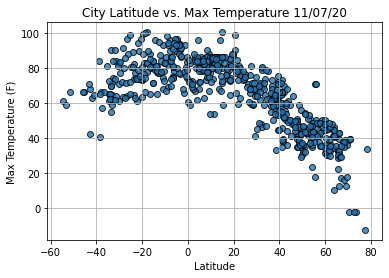

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

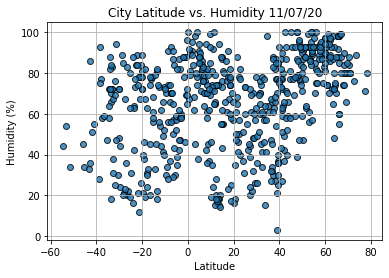

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

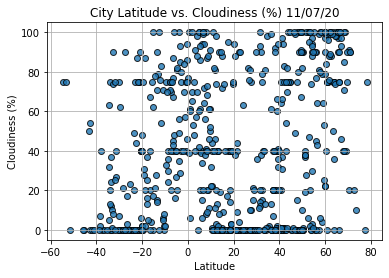

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

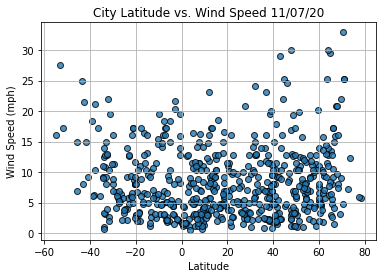

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()